In [3]:
import pandas as pd
import os
from utils import get_file_list

data_dir = r'D:\Projects\LipReadingProject\data'
csv_dir = os.path.join(data_dir, 'csv_transcripts')
freq_path = os.path.join(data_dir, 'freq.csv')
start_date = None
end_date = None

# get file list from start_date to end_date
csv_files = get_file_list(files=os.listdir(csv_dir),
                          start=start_date,
                          end=end_date)

word_df = pd.DataFrame(columns=['start', 'end', 'word'])

for csv_file in csv_files:
    csv_path = os.path.join(csv_dir, csv_file)
    temp_df = pd.read_csv(csv_path)
    word_df = pd.concat([word_df, temp_df], ignore_index=True)

# get word frequency
freq_df = pd.read_csv(freq_path)


In [4]:
word_df.describe()
freq_df.describe()

,7
count,1181.000000
mean,36.844200
std,104.500018
min,1.000000
25%,2.000000
50%,6.000000
75%,27.000000
max,1511.000000


In [ ]:
freq_list = sorted(list(zip(freq_df['word'], freq_df['frequency'])),
                   key=lambda x: x[1], reverse=True)
threshold = 10
no_of_label = 0
for word, freq in freq_list:
    if freq < threshold:
        no_of_label += 1
print(f'There are {no_of_label} classes having number of sample less than {threshold}')

NameError: name 'freq_df' is not defined

<Figure size 100000x100000 with 0 Axes>

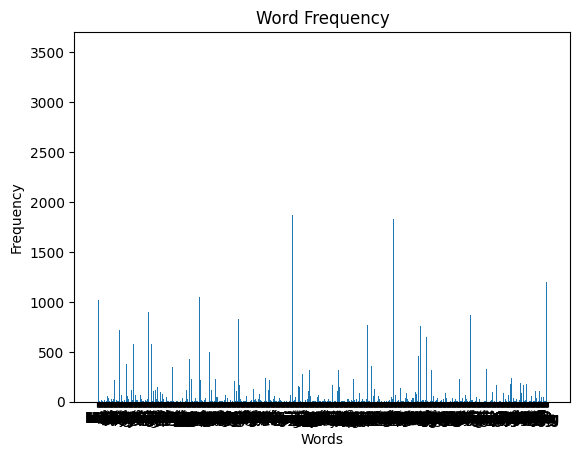

In [8]:
# plot the bar chart
# Get words and their frequency from dictionary
words = list(freq_dict.keys())
freqs = list(freq_dict.values())

# Create a bar chart using matplotlib
plt.figure(figsize=(1000, 1000))
fig, ax = plt.subplots()
ax.bar(words, freqs)
# ax.set_xlim(-0.5, len(x) - 0.5)
ax.set_xlabel('Words')
ax.set_ylabel('Frequency')
ax.set_title('Word Frequency')
plt.show()

In [9]:
import pysrt

freq_list = sorted(list(zip(freq_df['word'], freq_df['frequency'])),
                   key=lambda x: x[1], reverse=True)



In [24]:
def minCostToMoveChips(position):
    """
    :type position: List[int]
    :rtype: int
    """
    pos_list = [0] * max(position)
    cost = 0
    for pos in position:
        pos_list[pos-1] += 1
    for i in range(len(pos_list)):
        if pos_list[i] != 0:
            if i + 1 < len(pos_list) and pos_list[i] < pos_list[i+1]:
                pos_list[i+1] += pos_list[i]
                cost += pos_list[i]
                pos_list[i] = 0
            elif i + 2 < len(pos_list):
                pos_list[i+2] += pos_list[i]
                pos_list[i] = 0 
    return cost

minCostToMoveChips([2,2,2,3,3])

0

In [2]:
from vPhon import convert_grapheme_to_phoneme
convert_grapheme_to_phoneme('lắp lấp', dialect='s')
# TODO: compare all vocabs to see if we can remove the superscripts

'lapD1 ləpD1'

In [2]:
from label_processor import LabelProcessor
from vPhon import convert_grapheme_to_phoneme
data_dir = r'D:\Projects\LipReadingProject\data'
label_processor = LabelProcessor(data_dir=data_dir,
                                 n_class=400)
result = []
similar = ['a', 'ə', 'i:', 'i']
words = list(label_processor.freq_dict.keys())
for i in range(len(words)):
    word1 = words[i]
    phon1 = convert_grapheme_to_phoneme(words[i])
    for j in range(i+1, len(words)):
        word2 = words[j]
        phon2 = convert_grapheme_to_phoneme(word2)
        if phon1[0] == phon2[0] and phon1[-3:] == phon2[-3:]:
            if phon1[1:-3] in similar and phon2[1:-3] in similar:
                result.append([word1, phon1, word2, phon2])
result

[['bắt', 'ɓakD1', 'bất', 'ɓəkD1'],
 ['nhá', 'ɲaːB1', 'nhớ', 'ɲəːB1'],
 ['vâng', 'vəŋA1', 'văn', 'vaŋA1'],
 ['ờ', 'ʔəːA2', 'à', 'ʔaːA2']]

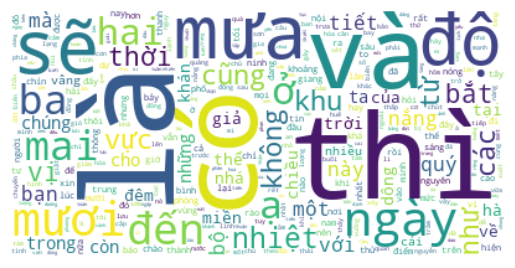

('là', 2013)
('thì', 1718)
('có', 1379)
('và', 1293)
('mưa', 1171)
('sẽ', 1151)
('độ', 1045)
('ngày', 1027)
('mươi', 952)
('đến', 806)
('mai', 736)
('ba', 732)
('ở', 708)
('ạ', 706)
('hai', 623)
('nhiệt', 574)
('từ', 547)
('khu', 532)
('cũng', 526)
('vực', 519)
('các', 503)
('không', 499)
('thời', 458)
('như', 454)
('vị', 446)
('bắt', 436)
('nắng', 436)
('quý', 434)
('bộ', 421)
('này', 414)
('mà', 395)
('một', 384)
('bạn', 384)
('tiết', 378)
('với', 376)
('trong', 372)
('những', 367)
('ta', 349)
('cho', 349)
('chúng', 340)
('còn', 333)
('hà', 307)
('miền', 292)
('đêm', 286)
('nhá', 286)
('chiều', 280)
('trời', 276)
('tại', 261)
('dông', 260)
('của', 259)
('thể', 257)
('về', 253)
('khán', 251)
('giả', 250)
('vâng', 249)
('cái', 249)
('nhiều', 246)
('khoảng', 244)
('nam', 238)
('thành', 236)
('cao', 235)
('nay', 232)
('chào', 227)
('xin', 213)
('rất', 212)
('nóng', 207)
('ra', 205)
('vào', 203)
('nhất', 202)
('nội', 198)
('nơi', 196)
('vẫn', 195)
('đó', 193)
('báo', 192)
('rồi', 191)
('t

In [4]:
label_processor.plot_word_cloud()
print(*sorted(list(label_processor.freq_dict.items()), key=lambda x: x[1], reverse=True), sep='\n')

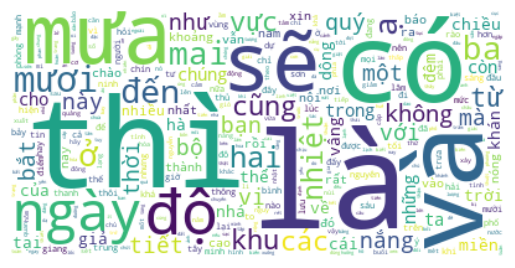

('là', 2014)
('thì', 1718)
('có', 1379)
('và', 1293)
('mưa', 1171)
('sẽ', 1151)
('độ', 1045)
('ngày', 1027)
('mươi', 952)
('đến', 806)
('mai', 736)
('ba', 732)
('ở', 708)
('ạ', 706)
('hai', 623)
('nhiệt', 574)
('từ', 547)
('khu', 532)
('cũng', 526)
('vực', 519)
('các', 503)
('không', 499)
('thời', 458)
('như', 454)
('vị', 446)
('bắt', 436)
('nắng', 436)
('quý', 434)
('bộ', 421)
('này', 414)
('mà', 395)
('một', 384)
('bạn', 384)
('tiết', 378)
('với', 376)
('trong', 372)
('những', 367)
('ta', 349)
('cho', 349)
('chúng', 340)
('còn', 333)
('hà', 307)
('miền', 292)
('đêm', 286)
('nhá', 286)
('chiều', 280)
('trời', 276)
('tại', 261)
('dông', 260)
('của', 259)
('thể', 257)
('về', 253)
('khán', 251)
('giả', 250)
('vâng', 249)
('cái', 249)
('nhiều', 246)
('khoảng', 244)
('nam', 238)
('thành', 236)
('cao', 235)
('nay', 232)
('chào', 227)
('xin', 213)
('rất', 212)
('nóng', 207)
('ra', 205)
('vào', 203)
('nhất', 202)
('nội', 198)
('nơi', 196)
('vẫn', 195)
('đó', 193)
('báo', 192)
('rồi', 191)
('t

In [21]:
import numpy as np
from label_processor import LabelProcessor

data_dir = r'D:\Projects\LipReadingProject\data'
label_processor = LabelProcessor(data_dir=data_dir,
                                 n_class=0)

data = sorted(list(label_processor.freq_dict.values()))

# calculate the first quartile (Q1)
q1 = np.percentile(data, 25)

# calculate the second quartile (Q2) or median
q2 = np.median(data)

# calculate the third quartile (Q3)
q3 = np.percentile(data, 75)

label_processor.plot_word_cloud()
print(*sorted(list(label_processor.freq_dict.items()), key=lambda x: x[1], reverse=True), sep='\n')
print("First quartile (Q1): ", q1)
print("Second quartile (Q2) or median: ", q2)
print("Third quartile (Q3): ", q3)

In [ ]:
!python extract_word_video.py -d D:\Projects\LipReadingProject\test_data -s 20220812 -e 20220812 -m skip
!python extract_word_video.py -d D:\Projects\LipReadingProject\test_data -s 20220816 -e 20220816 -m skip
!python extract_word_video.py -d D:\Projects\LipReadingProject\test_data -s 20220818 -e 20220818 -m skip
!python extract_word_video.py -d D:\Projects\LipReadingProject\test_data -s 20220819 -e 20220819 -m skip
!python extract_word_video.py -d D:\Projects\LipReadingProject\test_data -s 20220820 -e 20220820 -m skip
!python extract_word_video.py -d D:\Projects\LipReadingProject\test_data -s 20220821 -e 20220821 -m skip
!python extract_word_video.py -d D:\Projects\LipReadingProject\test_data -s 20220824 -e 20220824 -m skip

# Resolution

In [ ]:
import cv2
import os
from tqdm import tqdm

resolution_dict = dict()
label_dir = r'D:\Projects\LipReadingProject\data\word_videos'

for label in tqdm(os.listdir(label_dir),
                  desc='Checking resolution',
                  total=len(os.listdir(label_dir)),
                  unit=' label'):
    sample_dir = os.path.join(label_dir, label)
    train_dir = os.path.join(sample_dir, 'train')
    val_dir = os.path.join(sample_dir, 'val')
    test_dir = os.path.join(sample_dir, 'test')
    for dir in [train_dir, val_dir, test_dir]:
        for sample in os.listdir(dir):
            sample_path = os.path.join(sample_dir, sample)
            cap = cv2.VideoCapture(sample_path)
            
            # Get the resolution of the video
            width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
            height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

            # Print the resolution of the video
            resolution_dict[f'{width}x{height}'] = resolution_dict.get(f'{width}x{height}', 0) + 1

            # Release the video capture object
            cap.release()

print(resolution_dict)

Checking resolution: 100%|██████████| 1256/1256 [4:00:42<00:00, 11.50s/ label]   

n_train: 49021
n_val: 5895
n_test: 6292


In [ ]:
import utils

video_res_dict = dict()
video_dir = r'D:\Projects\LipReadingProject\data\videos'

videos = utils.get_file_list(os.listdir(video_dir), '20220701', '20220825')
videos.extend(utils.get_file_list(os.listdir(video_dir), '20221221', '20230114'))

for video in tqdm(videos,
                desc='Check resolution',
                total=len(videos),
                unit=' video'):
    video_path = os.path.join(video_dir, video)
    cap = cv2.VideoCapture(video_path)
    
    # Get the resolution of the video
    width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Print the resolution of the video
    video_res_dict[video] = f'{width}x{height}'

    # Release the video capture object
    cap.release()

print(*video_res_dict.values(), sep='\n')

# Number of sample

In [7]:
import utils
import os
import pysrt
from tqdm import tqdm

sample_dict = dict()
srt_dir = r'D:\Projects\LipReadingProject\data\srt_transcripts'

srts = utils.get_file_list(os.listdir(srt_dir), '20220701', '20220810')
srts.extend(utils.get_file_list(os.listdir(srt_dir), '20221228', '20230114'))

for srt in tqdm(srts,
                desc='Compute length',
                total=len(srts),
                unit=' file'):
    srt_path = os.path.join(srt_dir, srt)
    subs = pysrt.open(srt_path)
    sample_dict[srt] = len(subs)

print(*sample_dict.values(), sep='\n')
print(f'Total sample: {sum(list(sample_dict.values()))}')

Compute length: 100%|██████████| 55/55 [00:01<00:00, 31.84 file/s]

1023
712
664
821
849
624
706
722
701
739
703
718
792
616
827
817
797
778
757
785
793
692
711
818
681
807
801
805
806
816
803
711
813
822
802
815
803
801
805
811
710
795
809
802
837
820
834
833
803
863
941
808
880
994
926
Total sample: 43522


In [1]:
import os
from tqdm import tqdm

n_train = 0
n_val = 0
n_test = 0
label_dir = r'D:\Projects\LipReadingProject\data\word_videos'

for label in tqdm(os.listdir(label_dir),
                  desc='Compute total length',
                  total=len(os.listdir(label_dir)),
                  unit=' label'):
    sample_dir = os.path.join(label_dir, label)
    train_dir = os.path.join(sample_dir, 'train')
    n_train += len(os.listdir(train_dir))
    val_dir = os.path.join(sample_dir, 'val')
    n_val += len(os.listdir(val_dir))
    test_dir = os.path.join(sample_dir, 'test')
    n_test += len(os.listdir(test_dir))

print(f'n_train: {n_train}')
print(f'n_val: {n_val}')
print(f'n_test: {n_test}')

Compute total length: 100%|██████████| 1256/1256 [00:01<00:00, 1082.21 label/s]

n_train: 49021
n_val: 5895
n_test: 6292


# Total length of videos

In [22]:
import utils
from moviepy.video.io.VideoFileClip import VideoFileClip

total_second = 0
n_train = 0
n_val = 0
n_test = 0
label_dir = r'D:\Projects\LipReadingProject\data\word_videos'

for label in tqdm(os.listdir(label_dir),
                  desc='Compute total length',
                  total=len(os.listdir(label_dir)),
                  unit=' label'):
    sample_dir = os.path.join(label_dir, label)
    train_dir = os.path.join(sample_dir, 'train')
    n_train += len(os.listdir(train_dir))
    val_dir = os.path.join(sample_dir, 'val')
    n_val += len(os.listdir(val_dir))
    test_dir = os.path.join(sample_dir, 'test')
    n_test += len(os.listdir(test_dir))
    for dir in [train_dir, val_dir, test_dir]:
        for sample in os.listdir(dir):
            sample_path = os.path.join(dir, sample)
            video = VideoFileClip(sample_path)
            total_second += video.duration
            video.close()

print(total_second)

Compute total length:  21%|██        | 260/1256 [58:44<3:16:08, 11.82s/ label]  

# Total vocab

In [6]:
import pysrt
import os
import utils
from tqdm import tqdm
from vPhon import convert_grapheme_to_phoneme

graph_dict = dict()
word_dict = dict()
srt_dir = r'D:\Projects\LipReadingProject\data\srt_transcripts'

# srts = utils.get_file_list(os.listdir(srt_dir), '20220701', '20230114')
srts = utils.get_file_list(os.listdir(srt_dir), '20220701', '20220810')
srts.extend(utils.get_file_list(os.listdir(srt_dir), '20221228', '20230114'))
for srt in tqdm(srts,
                desc='Compute total vocab',
                total=len(srts),
                unit=' file'):
    srt_path = os.path.join(srt_dir, srt)
    subs = pysrt.open(srt_path)
    for sub in subs:
        word = sub.text
        if '_0' not in word:
            word_dict[word] = 1
        graph_dict[convert_grapheme_to_phoneme(word)] = word
print(f'{len(graph_dict)}')
print(len(word_dict))
print(*sorted(list(word_dict.keys())), sep='\n')

Compute total vocab: 100%|██████████| 55/55 [00:02<00:00, 20.45 file/s]

1190
1250
a
ai
an
anh
ba
ban
bao
bay
biên
biến
biết
biển
biện
biệt
buôn
buốt
buổi
bà
bài
bá
bác
bách
bái
bán
bánh
báo
bát
bây
bão
bè
bé
bên
bình
bí
bò
bóp
bôi
bù
bùi
băng
bơi
bước
bạc
bạch
bạn
bản
bảng
bảo
bảy
bất
bầu
bật
bắc
bắn
bắt
bằng
bến
bệnh
bị
bỏng
bốn
bổ
bộ
bột
bớt
bờ
bở
bởi
bụi
bức
bừng
ca
cai
cam
cao
che
chi
chia
chiêm
chiếc
chiến
chiều
cho
chu
chung
chuyển
chuyện
chuẩn
chuồng
chuỗi
chàng
chào
cháy
châu
chênh
chí
chín
chính
chóng
chú
chúc
chúng
chút
chăn
chăng
chơi
chưa
chạm
chấm
chất
chậm
chắc
chắn
chẳng
chế
chết
chỉ
chị
chịu
chọn
chống
chỗ
chớp
chờ
chợt
chục
chụp
chủ
chứ
chứa
chức
co
coi
con
cu
cua
cung
cuốc
cuối
cuốn
cà
càng
cá
các
cách
cái
cám
cánh
cân
câu
cây
còn
có
cóng
cô
côn
công
cùng
cú
cúm
cũ
cũng
cơ
cơm
cơn
cường
cạnh
cả
cảm
cảnh
cấp
cầm
cần
cẩm
cẩn
cận
cập
cắm
cố
cổ
cộng
cột
cụ
cục
của
cứ
cửa
cửu
cực
da
danh
dao
di
diễn
diện
diệp
diệu
do
doanh
doãn
du
dung
duy
dài
dành
dày
dán
dân
dâu
dây
dông
dõi
dù
dùng
dĩ
dương
dưới
dường
dược
dạ
dạo
dải
dấu
dần
dầu
dẫn
dập
dặn

In [1]:
from google.cloud import speech_v1p1beta1 as speech

client = speech.SpeechClient()

# The name of the audio file to transcribe
audio_file = r"D:\Downloads\20220701 (audio-extractor (mp3cut.net).mp3"

# Read the audio file and pass it to the Speech-to-Text API
with open(audio_file, 'rb') as f:
    content = f.read()

audio = speech.RecognitionAudio(content=content)

# Configure the transcription request
config = speech.RecognitionConfig(
    encoding=speech.RecognitionConfig.AudioEncoding.LINEAR16,
    sample_rate_hertz=16000,
    language_code='en-US',
)

# Send the request and receive the transcription response
response = client.recognize(config=config, audio=audio)

# Print the transcription results
for result in response.results:
    print(result.alternatives[0].transcript)


ModuleNotFoundError: No module named 'google'